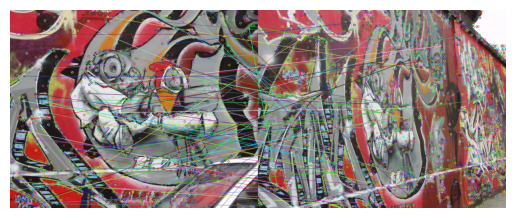

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv.imread('Images for Q4/img1.ppm')  
image5 = cv.imread('Images for Q4/img5.ppm')


# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect SIFT features and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints5, descriptors5 = sift.detectAndCompute(image5, None)

# Create a BFMatcher (Brute-Force Matcher)
bf_matcher = cv.BFMatcher()

# Match SIFT features between the two images
matches = bf_matcher.knnMatch(descriptors1, descriptors5, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good_matches.append(match1)

# Extract locations of good matches
points_image1 = np.zeros((len(good_matches), 2), dtype=np.float32)
points_image5 = np.zeros((len(good_matches), 2), dtype=np.float32)
for i, match in enumerate(good_matches):
    points_image1[i, :] = keypoints1[match.queryIdx].pt
    points_image5[i, :] = keypoints5[match.trainIdx].pt

# Draw and display the matching
matched_image = cv.drawMatches(image1, keypoints1, image5, keypoints5, good_matches, None)
plt.imshow(cv.cvtColor(matched_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def find_features(img):
    sift = cv.SIFT_create()
    key, des = sift.detectAndCompute(img, None)
    return key, des

def find_matches(des1, des5):
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des5, k=2)
    return matches

def calculate_homography(sample):
    A = []
    for i in range(len(sample)):
        x1, y1, x2, y2 = sample[i, 0], sample[i, 1], sample[i, 2], sample[i, 3]
        A.append([-x1, -y1, -1, 0, 0, 0, x2*x1, x2*y1, x2])
        A.append([0, 0, 0, -x1, -y1, -1, y2*x1, y2*y1, y2])

    A = np.matrix(A)
    U, S, V = np.linalg.svd(A)
    H = np.reshape(V[-1], (3, 3))
    H = (1/H.item(8))*H
    return H

def calculate_distance(H, correspondence):
    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimate_p2 = np.dot(H, p1)
    estimate_p2 = (1/estimate_p2.item(2))*estimate_p2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimate_p2
    return np.linalg.norm(error)

def ransac(corres, threshold):
    max_inliers = []
    homography = []

    for i in range(100):
        corr1 = corres[np.random.randint(0, len(corres))]
        corr2 = corres[np.random.randint(0, len(corres))]
        sample = np.vstack((corr1, corr2))
        corr3 = corres[np.random.randint(0, len(corres))]
        sample = np.vstack((sample, corr3))
        corr4 = corres[np.random.randint(0, len(corres))]
        sample = np.vstack((sample, corr4))
        
        h = calculate_homography(sample)
        inliers = np.zeros((1, 4))
        
        for j in range(len(corres)):
            distance = calculate_distance(h, corres[j])
            if distance < 5:
                inliers = np.vstack((inliers, corres[j]))
               
        inliers = np.delete(inliers, 0, 0)

        if len(inliers) > threshold:
            max_inliers = inliers
            homography = calculate_homography(max_inliers)
       
    return homography, max_inliers

img_lst = []
for i in range(1, 6):
    img = cv.imread('Images for Q4/img' + str(i) + '.ppm')
    img_lst.append(img)

homographies = []
estimated_threshold = 100

for i in range(4):
    correspondence = []
    key1, des1 = find_features(img_lst[i])
    key5, des5 = find_features(img_lst[i + 1])
    keypoints = [key1, key5]
    matches = find_matches(des1, des5)

    for match in matches:
        (x1, y1) = keypoints[0][match[0].queryIdx].pt
        (x2, y2) = keypoints[1][match[0].trainIdx].pt
        correspondence.append([x1, y1, x2, y2])

    corres = np.matrix(correspondence)
    H, inliers = ransac(corres, estimated_threshold)
    homographies.append(H)

final_homography = homographies[3] @ homographies[2] @ homographies[1] @ homographies[0]
final_homography = (1 / final_homography.item(8)) * final_homography
print('Calculated Homography\n', final_homography)
print('Number of inliers', len(inliers))

print('Original Homography\n', open('Images for Q4/H1to5p').read())




Calculated Homography
 [[ 6.56133807e-01  7.94226156e-02  2.13344459e+02]
 [ 2.35677381e-01  1.20301575e+00 -3.50506508e+01]
 [ 5.42824183e-04 -1.48882847e-05  1.00000000e+00]]
Number of inliers 1284
Original Homography
    6.2544644e-01   5.7759174e-02   2.2201217e+02
   2.2240536e-01   1.1652147e+00  -2.5605611e+01
   4.9212545e-04  -3.6542424e-05   1.0000000e+00



NameError: name 'img1' is not defined

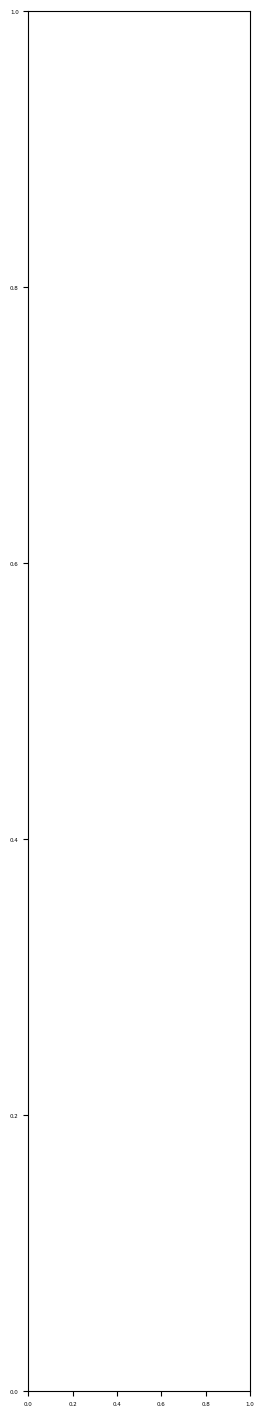

In [16]:
import cv2  as cv
import numpy as np
import matplotlib.pyplot as plt
#use small font for tiltle in plots
plt.rcParams.update({'font.size': 4})
#increase image gaps in plots
plt.rcParams['figure.subplot.hspace'] = 0.6
#decrease gap between image and title of each iamge in plots
plt.rcParams['figure.subplot.top'] = 0.8
#increase image sizes
plt.rcParams['figure.figsize'] = [20, 20]


plt.subplot(1,6,1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title('img1')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
plt.title('img5')
plt.axis('off')


h_text = open('Images for Q4/H1to5p','r')



#coverting h_text to homography matrix
original_H = []
for line in h_text:
    line = line.strip()
    line = line.split()
    line = [float(i) for i in line]
    original_H.append(line)

#using final homography matrix
computed_H = []
for i in range(3):
    computed_H.append(final_homography[i].tolist()[0])

#converting to matrix
computed_H = np.matrix(computed_H)

original_H = np.matrix(original_H)

image_perspective = cv.warpPerspective(img1, original_H, (img5.shape[1], img5.shape[0]))
plt.subplot(1,6,3)
plt.imshow(cv.cvtColor(image_perspective, cv.COLOR_BGR2RGB))
plt.title('persceptive image using original_H')
plt.axis('off')

#blending
threshold, mask = cv.threshold(cv.cvtColor(image_perspective, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img5_bg = cv.bitwise_and(img5, img5, mask=mask_inv)
dst = cv.addWeighted(img5_bg, 1, image_perspective, 1, 0)
output_image = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
#difference = cv.circle(output_image, (500, 600), 100, (0, 0, 255), 5)

#dst = cv.add(image_perspective, img5_bg)
plt.subplot(1,6,4)
plt.imshow(output_image) 
plt.title('blended image for original_H')
plt.axis('off')
 
image_perspective1 = cv.warpPerspective(img1, computed_H, (img5.shape[1], img5.shape[0]))
plt.subplot(1,6,5)
plt.imshow(cv.cvtColor(image_perspective, cv.COLOR_BGR2RGB))
plt.title('persceptive image for computed_H')
plt.axis('off')

#blending
threshold, mask = cv.threshold(cv.cvtColor(image_perspective1, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img5_bg = cv.bitwise_and(img5, img5, mask=mask_inv)
dst = cv.addWeighted(img5_bg, 1, image_perspective, 1, 0)
output_image = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
difference = cv.circle(output_image, (500, 600), 100, (0, 0, 255), 5)

#dst = cv.add(image_perspective, img5_bg)
plt.subplot(1,6,6)
plt.imshow(difference) 
plt.title('blended image for computed_H')
plt.axis('off')




In [11]:
from scipy import linalg
sift = cv.SIFT_create()

kp1, desc1 = sift.detectAndCompute(image1, None)
kp2, desc2 = sift.detectAndCompute(image5, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)
good, pts1, pts2 = [], [], []

for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

good, pts1, pts2 = np.array(good), np.array(pts1), np.array(pts2)
matched_img = cv.drawMatchesKnn(image1, kp1, image5, kp2, good[:50], None, flags=2)

def homography(pts1, pts2):
    mean1, mean2 = np.mean(pts1, axis=0), np.mean(pts2, axis=0)
    s1, s2 = len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts1-mean1)**2, axis=1))), len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts2-mean2)**2, axis=1)))
    tx1, ty1, tx2, ty2 = -s1*mean1[0], -s1*mean1[1], -s2*mean2[0], -s2*mean2[1]
    T1, T2 = np.array(((s1, 0, tx1), (0, s1, ty1), (0, 0, 1))), np.array(((s2, 0, tx2), (0, s2, ty2), (0, 0, 1)))
    A = []

    for i in range(len(pts1)):
        X11, X21 = T1 @ np.concatenate((pts1[i], [1])).reshape(3, 1), T2 @ np.concatenate((pts2[i], [1])).reshape(3, 1)
        A.append((-X11[0][0], -X11[1][0], -1, 0, 0, 0, X21[0][0]*X11[0][0], X21[0][0]*X11[1][0], X21[0][0]))
        A.append((0, 0, 0, -X11[0][0], -X11[1][0], -1, X21[1][0]*X11[0][0], X21[1][0]*X11[1][0], X21[1][0]))
    
    A = np.array(A)
    U, S, V = np.linalg.svd(A, full_matrices=True)
    h = np.reshape(V[-1], (3, 3))
    H = linalg.inv(T2) @ h @ T1
    H = (1 / H.item(8)) * H
    return H
        
def dist(P1, P2, H):
    p1 = np.array([P1[0], P1[1], 1])
    p2 = np.array([P2[0], P2[1], 1])

    p2_estimate = np.dot(H, p1.T)
    p2_estimate = (1 / p2_estimate[2]) * p2_estimate
    return np.linalg.norm(p2.T - p2_estimate)

def RANSAC_homography(points1, points2):
    inlier_count, selected_inliers = 0, None
    points = np.hstack((points1, points2))
    num_iterations = int(np.log(1 - 0.95)/np.log(1 - (1 - 0.5)**4))
    
    for _ in range(num_iterations):
        np.random.shuffle(points)
        pts1, pts1_rem, pts2, pts2_rem = points[:4, :2],  points[4:, :2], points[:4, 2:], points[4:, 2:]
        H = homography(pts1, pts2)
        inliers = [(pts1_rem[i], pts2_rem[i]) for i in range(len(pts1_rem)) if dist(pts1_rem[i], pts2_rem[i], H) < 100]
        if len(inliers) > inlier_count:
            inlier_count = len(inliers)
            selected_inliers = np.array(inliers)
    
    H = homography(selected_inliers[:, 0], selected_inliers[:, 1])
    return H

H = RANSAC_homography(pts1, pts2)
print(H)


[[-5.50041603e-01 -1.26774480e-01  2.48483430e+02]
 [-1.24521339e+00 -3.22731467e-01  5.20420491e+02]
 [-2.96157762e-03 -5.12272518e-04  1.00000000e+00]]


(-0.5, 799.5, 639.5, -0.5)

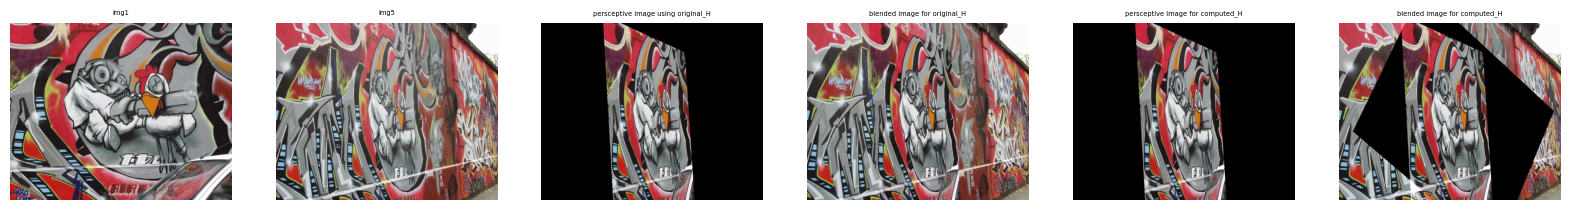

In [19]:
import cv2  as cv
import numpy as np
import matplotlib.pyplot as plt
#use small font for tiltle in plots
plt.rcParams.update({'font.size': 4})
#increase image gaps in plots
plt.rcParams['figure.subplot.hspace'] = 0.6
#decrease gap between image and title of each iamge in plots
plt.rcParams['figure.subplot.top'] = 0.8
#increase image sizes
plt.rcParams['figure.figsize'] = [20, 20]


plt.subplot(1,6,1)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.title('img1')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(cv.cvtColor(image5, cv.COLOR_BGR2RGB))
plt.title('img5')
plt.axis('off')


h_text = open('Images for Q4/H1to5p','r')



#coverting h_text to homography matrix
original_H = []
for line in h_text:
    line = line.strip()
    line = line.split()
    line = [float(i) for i in line]
    original_H.append(line)

#using final homography matrix
computed_H = []
for i in range(3):
    computed_H.append(H[i].tolist()[0])

# Convert computed_H to the appropriate data type and size
#computed_H = computed_H.astype(np.float32)



#converting to matrix
computed_H = np.matrix(computed_H)

original_H = np.matrix(original_H)

image_perspective = cv.warpPerspective(image1, original_H, (image5.shape[1], image5.shape[0]))
plt.subplot(1,6,3)
plt.imshow(cv.cvtColor(image_perspective, cv.COLOR_BGR2RGB))
plt.title('persceptive image using original_H')
plt.axis('off')

#blending
threshold, mask = cv.threshold(cv.cvtColor(image_perspective, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img5_bg = cv.bitwise_and(image5, image5, mask=mask_inv)
dst = cv.addWeighted(img5_bg, 1, image_perspective, 1, 0)
output_image = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
#difference = cv.circle(output_image, (500, 600), 100, (0, 0, 255), 5)

#dst = cv.add(image_perspective, img5_bg)
plt.subplot(1,6,4)
plt.imshow(output_image) 
plt.title('blended image for original_H')
plt.axis('off')

# Warp the image using the computed_H matrix
image_perspective1 = cv.warpPerspective(image1, computed_H, (image5.shape[1], image5.shape[0]))

#image_perspective1 = cv.warpPerspective(image1, computed_H, (image5.shape[1], image5.shape[0]))
plt.subplot(1,6,5)
plt.imshow(cv.cvtColor(image_perspective, cv.COLOR_BGR2RGB))
plt.title('persceptive image for computed_H')
plt.axis('off')

#blending
threshold, mask = cv.threshold(cv.cvtColor(image_perspective1, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img5_bg = cv.bitwise_and(image5, image5, mask=mask_inv)
dst = cv.addWeighted(img5_bg, 1, image_perspective, 1, 0)
output_image = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
#difference = cv.circle(output_image, (500, 600), 100, (0, 0, 255), 5)

threshold, mask = cv.threshold(cv.cvtColor(image_perspective1, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img5_bg = cv.bitwise_and(image5, image5, mask=mask_inv)
dst = cv.addWeighted(img5_bg, 1, image_perspective1, 1, 0)
output_image = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

#dst = cv.add(image_perspective, img5_bg)
plt.subplot(1,6,6)
plt.imshow(output_image) 
plt.title('blended image for computed_H')
plt.axis('off')


